 ## 1. Import Libraries

In [80]:
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import Normalize
from sklearn.metrics import confusion_matrix

## 2. Type of ds

In [2]:
type(fashion_mnist) # fashion_mnist is a module inside tensorflow.keras.datasets

module

## 3. Load Fashion-MNIST dataset

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
#The function load_data() returns a tuple containing training and testing data

# Print the shape of data
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [114]:
X_train.shape

(60000, 28, 28, 1)

In [115]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [4]:
## mnist.load_data()

### 3.1 Max Value in the entire X_train dataset

In [5]:
np.max(X_train)

255

### 3.2 Avg Value in the entire X_train Dataset

In [6]:
np.mean(X_train)

72.94035223214286

### 3.3 Labels (class names or categories) corresponding to the training dataset X_train

In [7]:
y_train # contains numbers (0–9), each representing a clothing category. Stores the class labels for the images in X_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
np.unique(y_train) # returns the sorted unique class labels present in y_train

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
class_names = [
    "t-shirt/top", "trouser", "pullover", "dress", "coat",
    "sandal", "shirt", "sneaker", "bag", "ankle boot"
]


# 0 → t-shirt/top  
# 1 → trouser  
# 2 → pullover  
# 3 → dress  
# 4 → coat  
# 5 → sandal  
# 6 → shirt  
# 7 → sneaker  
# 8 → bag  
# 9 → ankle boot  



## 4. Data Exploration|

### 4.1 Dimensions of the training dataset 

In [13]:
X_train.shape 

# 60000 → Number of training images (60,000 samples)
# 28 → Image height (28 pixels)
# 28 → Image width (28 pixels)

(60000, 28, 28)

### 4.2 Dimensions of the testing dataset 

In [14]:
X_test.shape

# 10000 → Number of test images (10,000 samples)
# 28 → Image height (28 pixels)
# 28 → Image width (28 pixels)

(10000, 28, 28)

### 4.3 Visualizing a sample image from the X_train dataset 

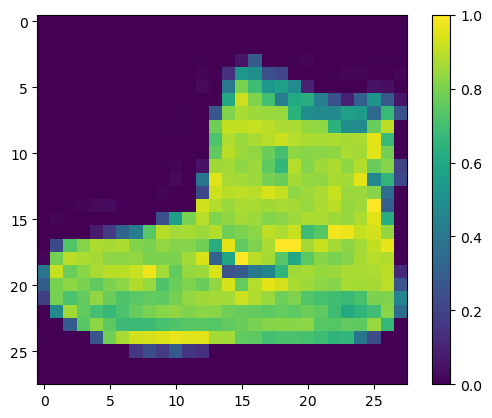

In [94]:
plt.figure() # Creates a new figure in Matplotlib
plt.imshow(X_train[0]) # Displays the second image from X_train. #cmap='gray'
plt.colorbar() # Adds a color scale next to the image.


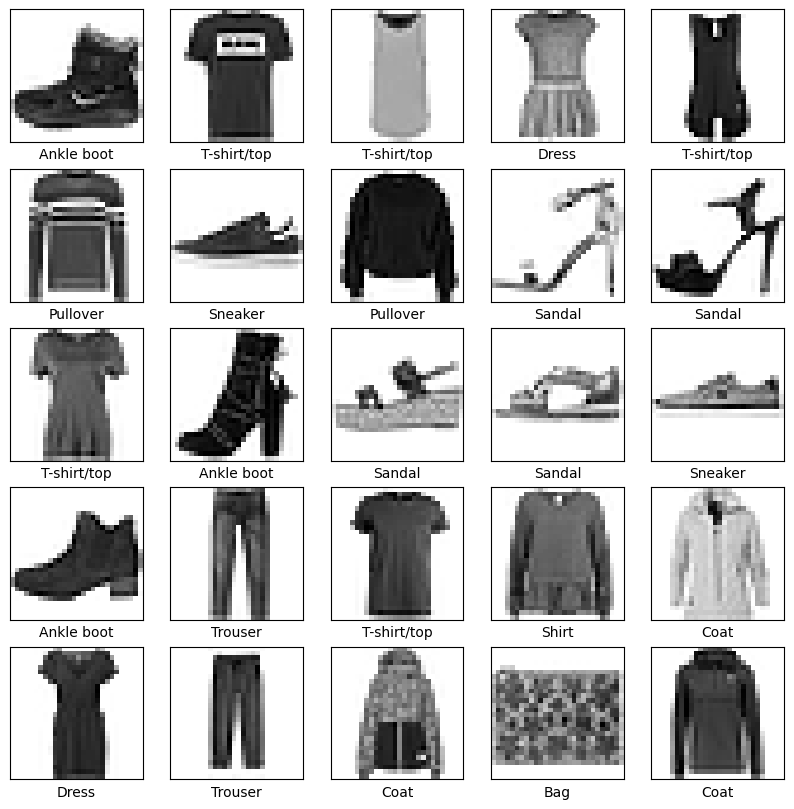

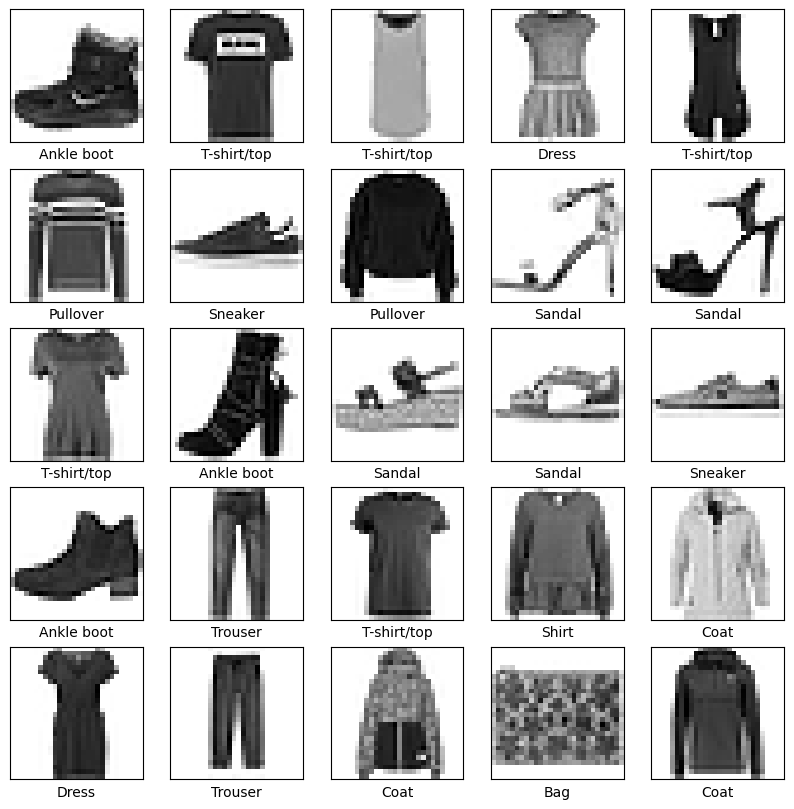

In [34]:


plt.figure(figsize=(10, 10))  # Set figure size

for i in range(25):
    plt.subplot(5, 5, i+1)  # Create 5x5 grid
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False)  # Remove grid
    plt.imshow(X_train[i], cmap=plt.cm.binary)  # Display image in black & white
    plt.xlabel(class_names[y_train[i]])  # Set label as class name

plt.show()  # Show all images
import matplotlib.pyplot as plt

# Class names for Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))  # Set figure size

for i in range(25):
    plt.subplot(5, 5, i+1)  # Create 5x5 grid
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False)  # Remove grid
    plt.imshow(X_train[i], cmap=plt.cm.binary)  # Display image in black & white
    plt.xlabel(class_names[y_train[i]])  # Set label as class name

plt.show()  # Show all images


### 4.4 Normalize the image pixel values from [0, 255] to [0, 1]

In [47]:
 X_train = X_train/255.0

In [48]:
 X_test = X_test/255.0

In [16]:
 np.max(X_train) # Max pixel value in the dataset X_train

1.0

### 4.5 Display a sample image to see results after normalization

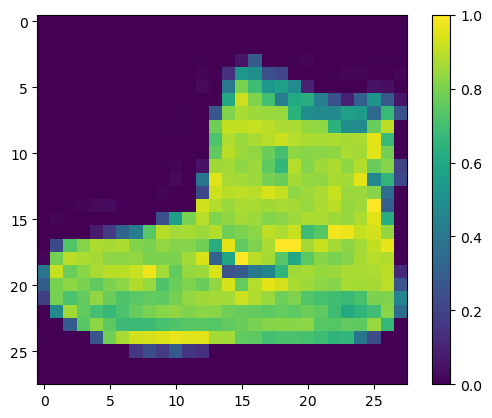

In [49]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

## 5 Data Augmentation

### 5.1 Reshaping 

In [50]:
# Reshape for augmentation (adding a channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)

### 5.2 Random selection

In [51]:
# Select 5 random images
random_indices = random.sample(range(X_train.shape[0]), 5)
random_images = X_train[random_indices]

### 5.3 Augmentation techniques

In [103]:
# 5 image augmentation techniques
augmentations = {
    "Rotated (30°)": ImageDataGenerator(rotation_range=30), #Randomly rotates the image up to 30 degrees.
    "Zoomed (20%)": ImageDataGenerator(zoom_range=0.2),  #Randomly zooms in or out by 20%.
    "Width Shifted (20%)": ImageDataGenerator(width_shift_range=0.2), # Moves the image left or right by 20% of its width.
    "Height Shifted (20%)": ImageDataGenerator(height_shift_range=0.2), # Moves the image up or down by 20% of its height.
    "Sheared (15°)": ImageDataGenerator(shear_range=15), #  Slants the image by 15 degrees (like tilting a page).
}


### 5.4 Visualizing each Aug Techn.

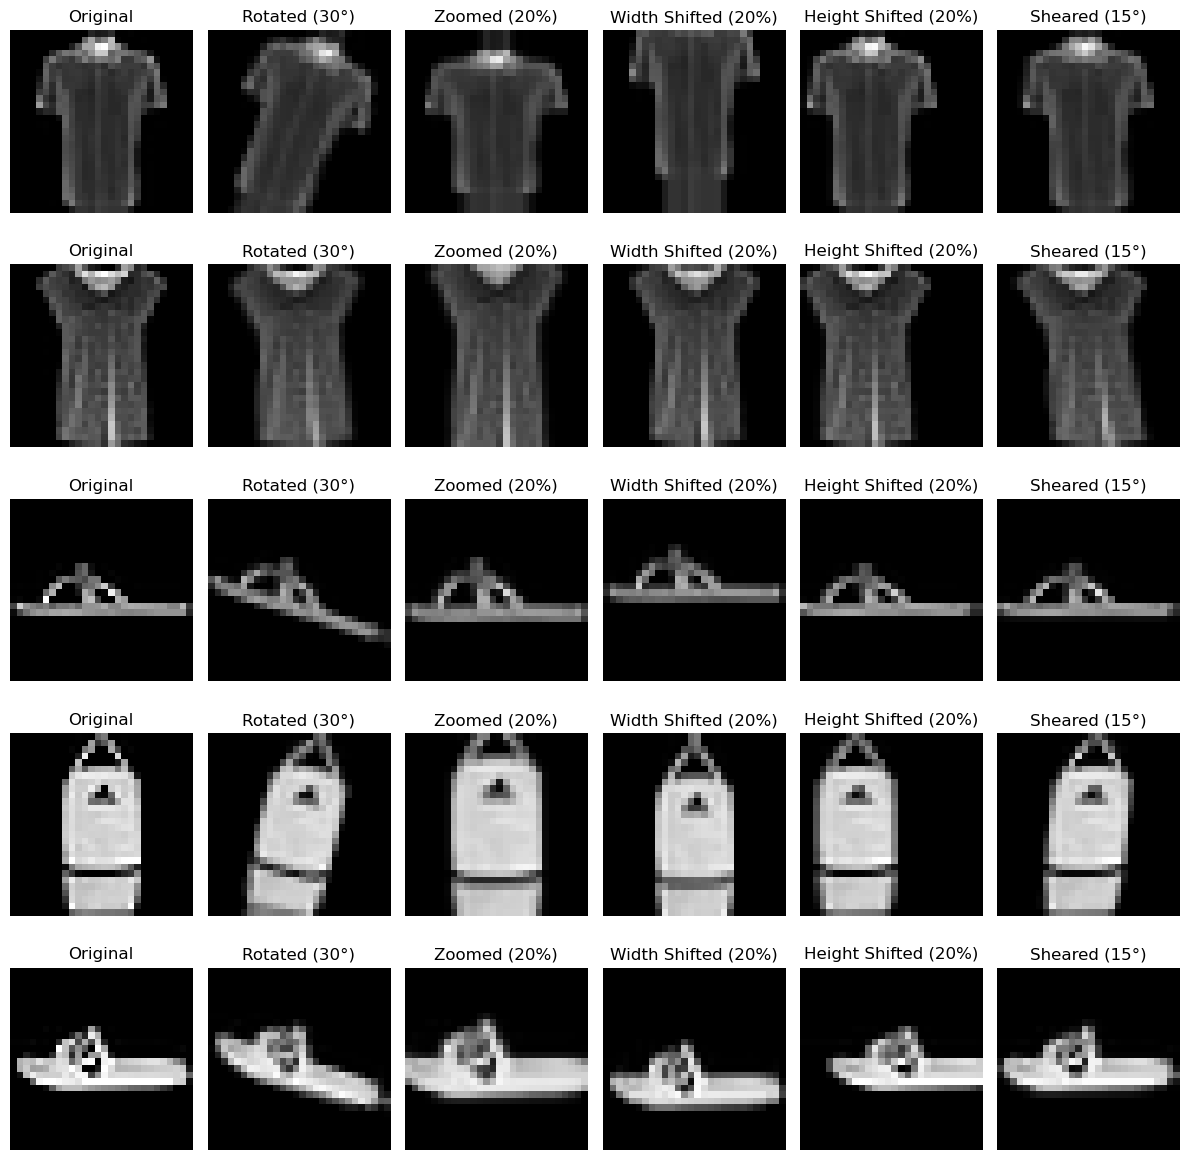

In [105]:

                           # rows = No of org images, 1 for org and add for augemented imgs
fig, axes = plt.subplots(len(random_images), len(augmentations) + 1, figsize=(12, 12))

# Choose a colormap - you can change this to other options like 'jet', 'plasma', 'inferno', etc.
colormap = 'gray'

# Create a normalizer to ensure consistent color mapping across all images
# Assuming pixel values are between 0-1 for grayscale images
norm = Normalize(vmin=0, vmax=1)

for i, image in enumerate(random_images):
    # Make sure image is 2D by squeezing if needed
    image_2d = image.squeeze()
    
    # Display the original image with colormap in the first column
    axes[i, 0].imshow(image_2d, cmap=colormap, norm=norm)
    axes[i, 0].set_title("Original")
    axes[i, 0].axis("off")
    
    # Apply each augmentation and display
    for j, (title, generator) in enumerate(augmentations.items()):
        # Prepare image for augmentation
        if len(image.shape) == 2:
            # Add batch and channel dimensions: (28,28) → (1,28,28,1)
            image_for_aug = np.expand_dims(np.expand_dims(image, axis=0), axis=-1)
        elif len(image.shape) == 3 and image.shape[-1] == 1:
            # Just add batch dimension: (28,28,1) → (1,28,28,1)
            image_for_aug = np.expand_dims(image, axis=0)
        else:
            # Handle other cases if needed
            image_for_aug = np.expand_dims(image, axis=0)
            
        # Generate augmented image
        augmented_image = next(generator.flow(image_for_aug, batch_size=1))[0]
        
        # Make sure augmented image is 2D
        augmented_image_2d = augmented_image.squeeze()
        
        # Display augmented image with colormap
        axes[i, j + 1].imshow(augmented_image_2d, cmap=colormap, norm=norm)
        axes[i, j + 1].set_title(title)
        axes[i, j + 1].axis("off")

plt.tight_layout()
plt.show()

## 6. Training Models

### 6.1 Model Training on Original Data  without Augmentation

In [60]:
# Reshape data to add channel dimension (for CNN)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [61]:
# Convert labels to categorical format (for categorical_crossentropy loss)
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)
# convert labels into a format that a neural network can understand. y_train and y_test labels are numbers (0 to 9)
# NN work better with categorical labels

In [92]:
# define the model, create_model() build and returns the CNN model
def create_model():
    model = Sequential([
        # Input layer -32 filters to detect small features e.g edges and textures of size 3, 3
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        BatchNormalization(), # adjusting values so that they have similar ranges

        #First Pooling layer - reduces image size by taking the max value in 2, 2 window. retain important features while reducing computation
        MaxPooling2D(2,2),
        # Second Convolutional Block -64 filters to detect complex features e.g shape or textures
        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(), # noramlize again to keep the values stable
        
        MaxPooling2D(2,2), # reduce the image size again to focus on most useful features
        Flatten(), # convert filtered image into 1d, prepare for classification
         # Fully Connected Layer -128 neurons to process extracted features
        Dense(128, activation='relu'),
        Dropout(0.5), # prevent overfitting - memorizing training data too much
        Dense(10, activation='softmax') # Final Outup layer - 10 neurons for 10 categories in fashion MNIST. Softmax gives a probability for each category
    ])
    return model # so that it can be used

# Create and compile model BEFORE augmentation
model_before = create_model() # Calls the function to create a new model.

model_before.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Optimizer (adam): Helps the model learn better.
# Loss function (categorical_crossentropy): Measures how wrong the predictions are.
# Metric (accuracy): Measures how many predictions are correct.

model_before.summary() # Displays a summary of all layers, filters, and parameters.





Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,418 (880.54 KB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

In [88]:

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_before = model_before.fit(
    X_train, y_train_categorical, 
    epochs=20, batch_size=64,
    validation_data=(X_test, y_test_categorical), 
    callbacks=[early_stopping]
)

# Feeds training data to the model.
###Trains for 5 epochs (5 rounds of learning).
##Batch size = 64 (Processes 64 images at a time).
#Uses test data for validation to check performance

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.8901 - loss: 0.3016 - val_accuracy: 0.8910 - val_loss: 0.2940
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9005 - loss: 0.2721 - val_accuracy: 0.8971 - val_loss: 0.2945
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9088 - loss: 0.2458 - val_accuracy: 0.8888 - val_loss: 0.3045
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9142 - loss: 0.2310 - val_accuracy: 0.8973 - val_loss: 0.2940


### Saving original model (before aug)

In [90]:
# Save model
model_before.save("model_before_augmentation.keras")

## 6.2  Model Training on Aug. Data 

In [91]:
# Define data augmentation
train_datagen = ImageDataGenerator(
    # small for the model to generalize better
    rotation_range=5, 
    zoom_range=0.1,
    width_shift_range=0.05, 
    height_shift_range=0.05, 
    horizontal_flip=True # though flipping left-to-right will make some items unrealistic, e.g text on T-shirts, 
)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Create augmented data generator
train_generator = train_datagen.flow(X_train, y_train_categorical, batch_size=64)

# Create and compile model AFTER augmentation
model_after = create_model()  # Create a new instance of the model
model_after.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with augmented data
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history_after = model_after.fit(
    train_generator, 
    epochs=20,
    validation_data=(X_test, y_test_categorical),
    callbacks=[early_stopping] 
)





Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 48ms/step - accuracy: 0.6978 - loss: 0.8649 - val_accuracy: 0.8504 - val_loss: 0.4048
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.8138 - loss: 0.5057 - val_accuracy: 0.8736 - val_loss: 0.3475
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.8370 - loss: 0.4419 - val_accuracy: 0.8754 - val_loss: 0.3350
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.8512 - loss: 0.4084 - val_accuracy: 0.8829 - val_loss: 0.3165
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 38ms/step - accuracy: 0.8552 - loss: 0.3958 - val_accuracy: 0.8692 - val_loss: 0.3525
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - accuracy: 0.8623 - loss: 0.3754 - val_accuracy: 0.8372 - val_loss: 0.4250
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8703 - loss: 0.3579 - val_accuracy: 0.8448 - val_loss: 0.3956


### Saving Model after augmentation

In [113]:
model_after.save("model_after_augmentation.keras")

## 7. Model performance Before and After Aug

In [107]:

# Load models
model_before = load_model("model_before_augmentation.keras", compile=False)
model_after = load_model("model_after_augmentation.keras", compile=False)


In [108]:
# Recompile to restore metrics
model_before.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_after.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [109]:



# Evaluate before augmentation
print("\n==== Model Performance BEFORE Augmentation ====")
#Computes loss (how wrong the model is) and accuracy (how well it classifies).
test_loss_before, test_accuracy_before = model_before.evaluate(X_test, y_test_categorical)
print(f"Test Accuracy: {test_accuracy_before:.4f}")
print(f"Test Loss: {test_loss_before:.4f}")


y_pred_before = model_before.predict(X_test) # Runs the test images (X_test) through model_before to get predictions/probability distribution.
y_pred_classes_before = np.argmax(y_pred_before, axis=1) # selects the index of the highest probability in each row
y_true = np.argmax(y_test_categorical, axis=1) # converts them back to integer class labels



# Evaluate after augmentation
print("\n==== Model Performance AFTER Augmentation ====")
test_loss_after, test_accuracy_after = model_after.evaluate(X_test, y_test_categorical)
print(f"Test Accuracy: {test_accuracy_after:.4f}")
print(f"Test Loss: {test_loss_after:.4f}")

y_pred_after = model_after.predict(X_test)
y_pred_classes_after = np.argmax(y_pred_after, axis=1)




==== Model Performance BEFORE Augmentation ====
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8904 - loss: 0.3071
Test Accuracy: 0.8910
Test Loss: 0.2940
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

==== Model Performance AFTER Augmentation ====
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8844 - loss: 0.3225
Test Accuracy: 0.8829
Test Loss: 0.3165
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


## Confusion Matrix -BEFORE 

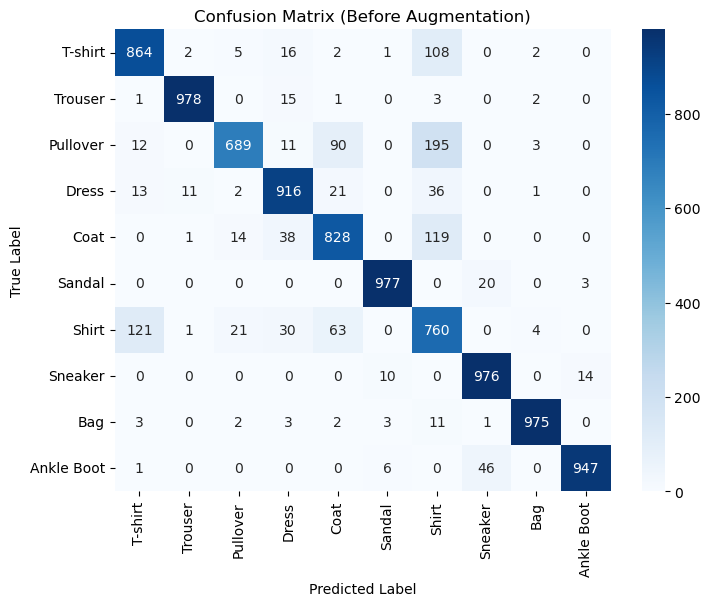

In [110]:



# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes_before)

# Define class labels
class_labels = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", 
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# Create heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Before Augmentation)")
plt.show()


## Confusion Matrix -AFTER


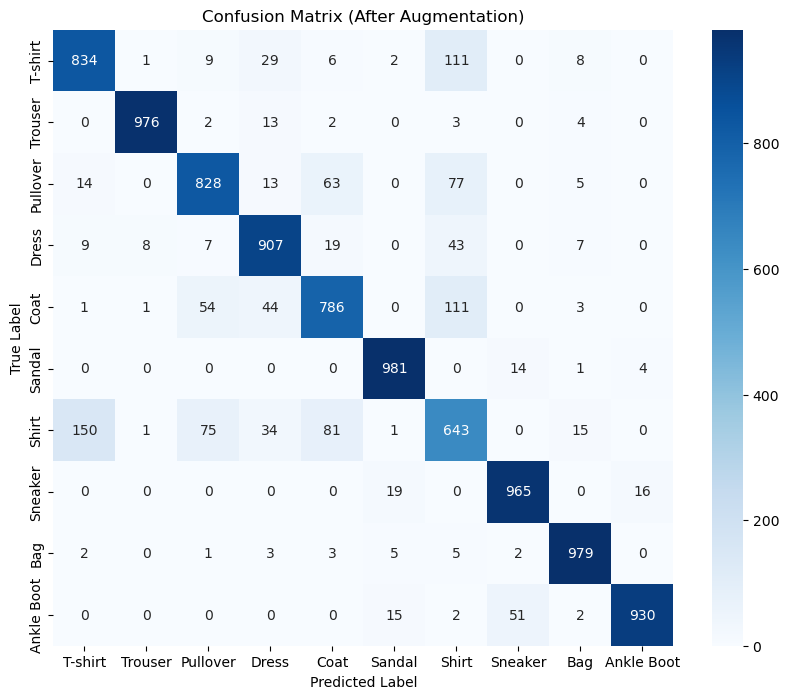

In [111]:
# Compute confusion matrix
conf_matrix_after = confusion_matrix(y_true, y_pred_classes_after)

# Define class labels
class_labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_after, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (After Augmentation)")

# Show the plot
plt.show()

### 7.1 Comparing the performance of the two models

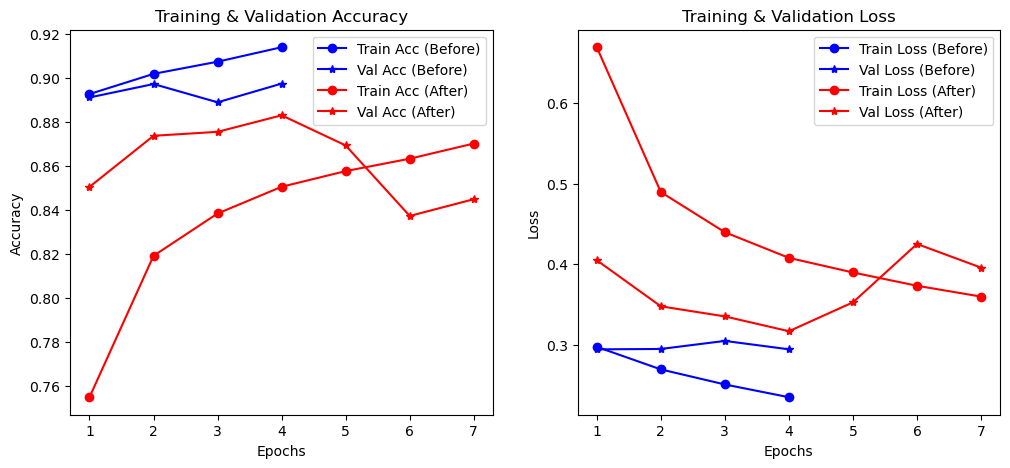

In [118]:
epochs_before = range(1, len(train_acc_before) + 1)
epochs_after = range(1, len(train_acc_after) + 1)

plt.figure(figsize=(12, 5))

# Accuracy Comparison
plt.subplot(1, 2, 1)
plt.plot(epochs_before, train_acc_before, 'bo-', label='Train Acc (Before)')
plt.plot(epochs_before, val_acc_before, 'b*-', label='Val Acc (Before)')
plt.plot(epochs_after, train_acc_after, 'ro-', label='Train Acc (After)')
plt.plot(epochs_after, val_acc_after, 'r*-', label='Val Acc (After)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# Loss Comparison
plt.subplot(1, 2, 2)
plt.plot(epochs_before, train_loss_before, 'bo-', label='Train Loss (Before)')
plt.plot(epochs_before, val_loss_before, 'b*-', label='Val Loss (Before)')
plt.plot(epochs_after, train_loss_after, 'ro-', label='Train Loss (After)')
plt.plot(epochs_after, val_loss_after, 'r*-', label='Val Loss (After)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()
